In [101]:
#提取数据集
from sklearn import datasets
#加载红酒（wine）数据集
wine=datasets.load_wine()
#红酒的变量
X=wine.data
#分类
y=wine.target
#数据集划分
from sklearn.model_selection import train_test_split
# 将数据集分为：训练集、测试集
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.3,# 测试集占20%，隐含 训练集占80%
    random_state=4, # 随机种子，保证每次运行程序时划分结果一致
    shuffle=True, # 分割前对数据集进行洗牌
    stratify=y) # 根据标签(类别)进行分层抽样，确保训练集和测试集中各类别样本的比例与原始数据集中相同。

In [105]:
 # <3> 训练模型、预测
from sklearn.tree import DecisionTreeClassifier #创建决策树模型
I_model=DecisionTreeClassifier(criterion="entropy")# 创建决策树分类器,用信息熵"entropy"作为划分标准。默认CART分类树
I_model.fit(X_train,y_train)
y_pred=I_model.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
print(f"准确率：{acc:.2f}")
miss_calssified=(y_pred !=y_test).sum()
print("Misclassified",miss_calssified)

准确率：0.91
Misclassified 5


|--- feature_9 <= 3.46
|   |--- class: 1
|--- feature_9 >  3.46
|   |--- feature_6 <= 1.58
|   |   |--- feature_10 <= 0.97
|   |   |   |--- class: 2
|   |   |--- feature_10 >  0.97
|   |   |   |--- class: 1
|   |--- feature_6 >  1.58
|   |   |--- feature_12 <= 724.50
|   |   |   |--- feature_10 <= 0.83
|   |   |   |   |--- class: 0
|   |   |   |--- feature_10 >  0.83
|   |   |   |   |--- class: 1
|   |   |--- feature_12 >  724.50
|   |   |   |--- class: 0



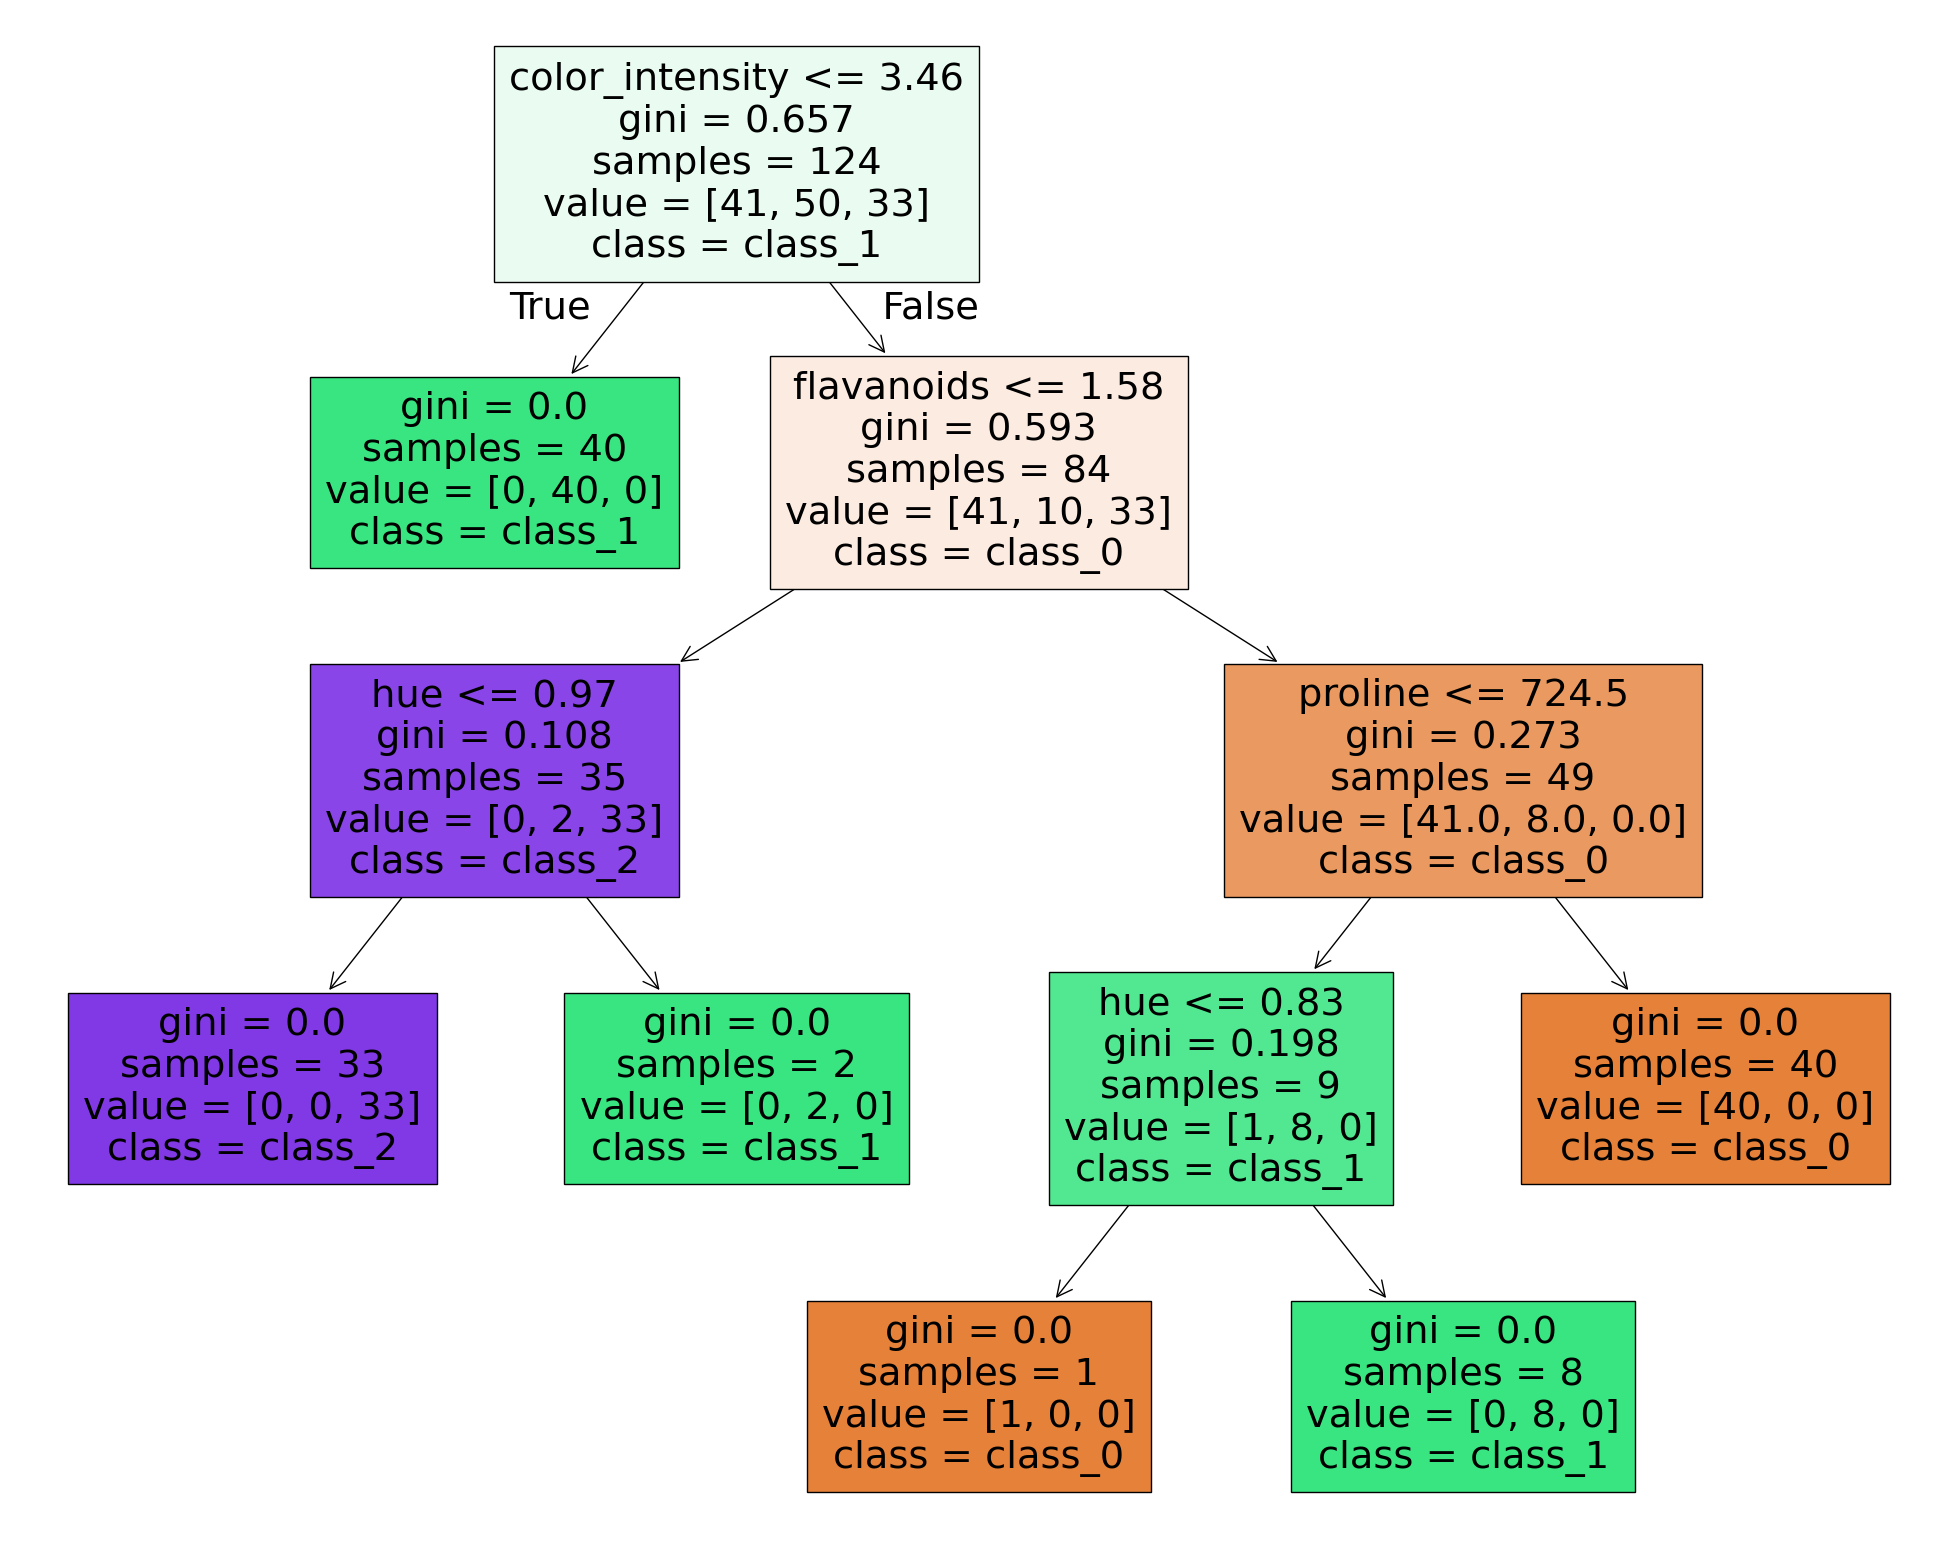

In [104]:
from sklearn import tree
tree_presentation=tree.export_text(I_model)
print(tree_presentation)
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(
    I_model,  # 训练好的决策树模型
    feature_names=wine.feature_names,  # 特征名称（如花萼长度、宽度）
    class_names=wine.target_names,     # 类别名称（如 setosa, versicolor）
    filled=True                        # 用颜色填充节点，区分类别或纯度
)
plt.show()  # 显示图形